In [1]:
import pandas as pd

# Load the dataset
file_path = './Data.csv'
df = pd.read_csv(file_path)

In [2]:
df.head()

,Std,ID,Material,Heat treatment,Tensile_Strength(MPa),Yield_Strength(MPa),Strain,BHN,Elastic_Modulus,Shear_Modulus,Poisson_Ratio,Density,Pressure_at_Yield,Desc,HV
0,ANSI,D8894772B88F495093C43AF905AB6373,Steel SAE 1015,as-rolled,421,314,39.0,126.0,207000,79000,0.3,7860,NaN,NaN,NaN
1,ANSI,05982AC66F064F9EBC709E7A4164613A,Steel SAE 1015,normalized,424,324,37.0,121.0,207000,79000,0.3,7860,NaN,NaN,NaN
2,ANSI,356D6E63FF9A49A3AB23BF66BAC85DC3,Steel SAE 1015,annealed,386,284,37.0,111.0,207000,79000,0.3,7860,NaN,NaN,NaN
3,ANSI,1C758F8714AC4E0D9BD8D8AE1625AECD,Steel SAE 1020,as-rolled,448,331,36.0,143.0,207000,79000,0.3,7860,NaN,NaN,NaN
4,ANSI,DCE10036FC1946FC8C9108D598D116AD,Steel SAE 1020,normalized,441,346,35.8,131.0,207000,79000,0.3,7860,550.0,NaN,NaN


**Checking presence of null values**

In [3]:
#checking empty data
for col in df.columns:
    print(col,":",df[col].isnull().sum()/df.shape[0]*100,"%")

Std : 0.0 %
ID : 0.0 %
Material : 0.0 %
Heat treatment : 48.324742268041234 %
Tensile_Strength(MPa) : 0.0 %
Yield_Strength(MPa) : 0.0 %
Strain : 13.27319587628866 %
BHN : 70.16752577319588 %
Elastic_Modulus : 0.0 %
Shear_Modulus : 0.0 %
Poisson_Ratio : 0.0 %
Density : 0.0 %
Pressure_at_Yield : 87.56443298969072 %
Desc : 36.79123711340206 %
HV : 89.36855670103093 %


**->It can be seen that BHN, Pressure_at_Yield and HV have null values more than 50%. So they can be removed. Among all the columns: std,ID are not useful values as they represent material id and name. So they can be removed.**

In [4]:
df = df.iloc[:,[3,4,5,6,8,9,10,11,13]]
df.head()

,Heat treatment,Tensile_Strength(MPa),Yield_Strength(MPa),Strain,Elastic_Modulus,Shear_Modulus,Poisson_Ratio,Density,Desc
0,as-rolled,421,314,39.0,207000,79000,0.3,7860,NaN
1,normalized,424,324,37.0,207000,79000,0.3,7860,NaN
2,annealed,386,284,37.0,207000,79000,0.3,7860,NaN
3,as-rolled,448,331,36.0,207000,79000,0.3,7860,NaN
4,normalized,441,346,35.8,207000,79000,0.3,7860,NaN


**Since the value of Heat treatment and Description(Desc) have loss less than 50%, so replacing all NaN values with unknown values**

In [5]:
df['Desc'] = df['Desc'].fillna('Unknown')

In [6]:
df['Heat treatment']=df['Heat treatment'].fillna('Unknown')

**Checking null values in modified dataset**

In [7]:
#checking empty data
for col in df.columns:
    print(col,":",df[col].isnull().sum()/df.shape[0]*100,"%")

Heat treatment : 0.0 %
Tensile_Strength(MPa) : 0.0 %
Yield_Strength(MPa) : 0.0 %
Strain : 13.27319587628866 %
Elastic_Modulus : 0.0 %
Shear_Modulus : 0.0 %
Poisson_Ratio : 0.0 %
Density : 0.0 %
Desc : 0.0 %


**Since strain column has numerical values so it can be replaced with the interpolated values**

In [8]:
df['Strain'] = df['Strain'].interpolate()

In [9]:
df['Strain'].isnull().sum()

0

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Heat treatment'] = label_encoder.fit_transform(df['Heat treatment'])
df['Desc'] = label_encoder.fit_transform(df['Desc'])

**Printing the correlation matrix for analysing importance columns**

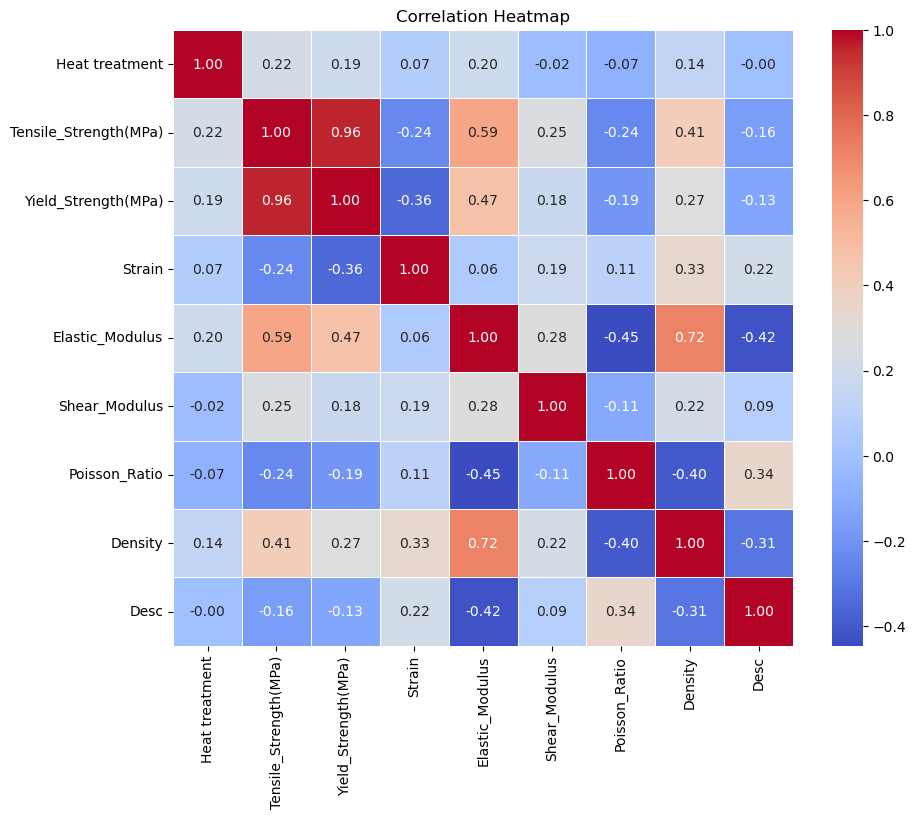

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


**From the above correlation matrix, it is seen that neither of Heat treatment, desc and strain have very less values close to moderate correlation region(i.e |corr| = 0.5). so they can be removed.**

In [12]:
df = df.drop(columns=['Heat treatment', 'Desc','Strain'])

In [13]:
df.head()

,Tensile_Strength(MPa),Yield_Strength(MPa),Elastic_Modulus,Shear_Modulus,Poisson_Ratio,Density
0,421,314,207000,79000,0.3,7860
1,424,324,207000,79000,0.3,7860
2,386,284,207000,79000,0.3,7860
3,448,331,207000,79000,0.3,7860
4,441,346,207000,79000,0.3,7860


In [14]:
df.to_csv("./filtered.csv")